In [4]:
from SocialNetwork.social_network_environment import *
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
#from SocialNetwork.cascade import *
from Advertising.learners.Greedy_algorithm import *
from experiment_utilities import *

seed = 6789 

arms = arms_creation(seed = 30291, number_of_arms= 20)

random.seed(seed)

exploration=4.2

deltas=[0.5,0.42,0.38,0.30,0.2,0.05]

social_network = social_network_environment()
social_network.init_from_json(json_path_network='Config/network.json', json_path_features='Config/features.json')


with open('Config/clairvoyants_sw.json', 'r') as file:
    clairvoyants = json.load(file)

with open('Config/bids.json', 'r') as file:
    data = json.load(file)
    bids = data.get('bids')


n_rounds = 20000
interval = 5000
window_size = 4000


In [13]:
from Advertising.learners.UCB_sw import *

ucb_sw_a = UCB_sw(arms = arms, hyperpar=exploration, window_size= window_size)
ucb_sw_f = UCB_sw(arms = arms, hyperpar=exploration, window_size= window_size)

exp_a = experiment(rounds = n_rounds, learner= ucb_sw_a, all_bids= bids, social_network= social_network, arms = arms,
            first = False, sliding_window= True, interval = interval)

exp_f = experiment(rounds = n_rounds, learner= ucb_sw_f, all_bids= bids, social_network= social_network, arms = arms,
                first = True, sliding_window= True, interval = interval, qualities=False)


In [7]:
cl_f = clairvoyants.get('clairvoyant_f_sw')
clairvoyant_f = []

for clair in cl_f:
    clairvoyant_f.append(np.full(interval, clair))


cl_a = clairvoyants.get('clairvoyant_a_sw')
clairvoyant_a = []

for clair in cl_a:
    clairvoyant_a.append(np.full(interval, clair))



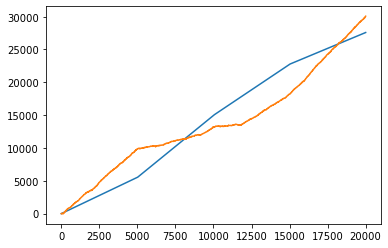

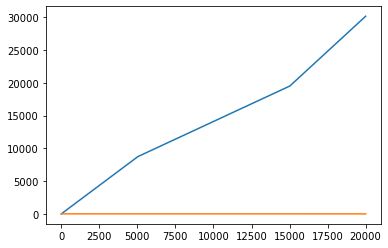

In [8]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(np.cumsum(clairvoyant_a))
plt.plot(np.cumsum(ucb_sw_a.collected_rewards))
plt.show()

plt.figure(1)
plt.plot(np.cumsum(clairvoyant_f))
plt.plot(np.cumsum(ucb_sw_f.collected_rewards))
plt.show()


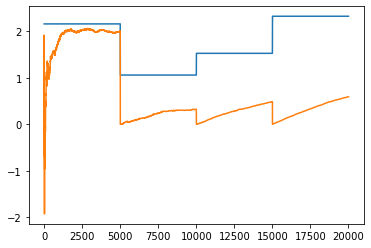

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(clairvoyant)
plt.plot(rolling_mean)
plt.show()


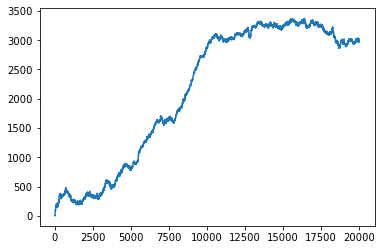

In [9]:
collected_rewards = ucb_nq_a.collected_rewards

plt.figure()
plt.plot(np.subtract(np.cumsum(clairvoyant), np.cumsum(collected_rewards)))
plt.show()